<a href="https://colab.research.google.com/github/NataliaCFreitas/Exerc-cios-Garcia/blob/main/Concrete_Compressive_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Concrete Compressive Strength

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import pymc as pm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pytensor.tensor as tt
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [3]:

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [5]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [6]:
y

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [10]:
features = concrete_compressive_strength.data.features
features.drop(['Age'], axis=1, inplace=True)
targets  = y = concrete_compressive_strength.data.targets

features

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5
...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9


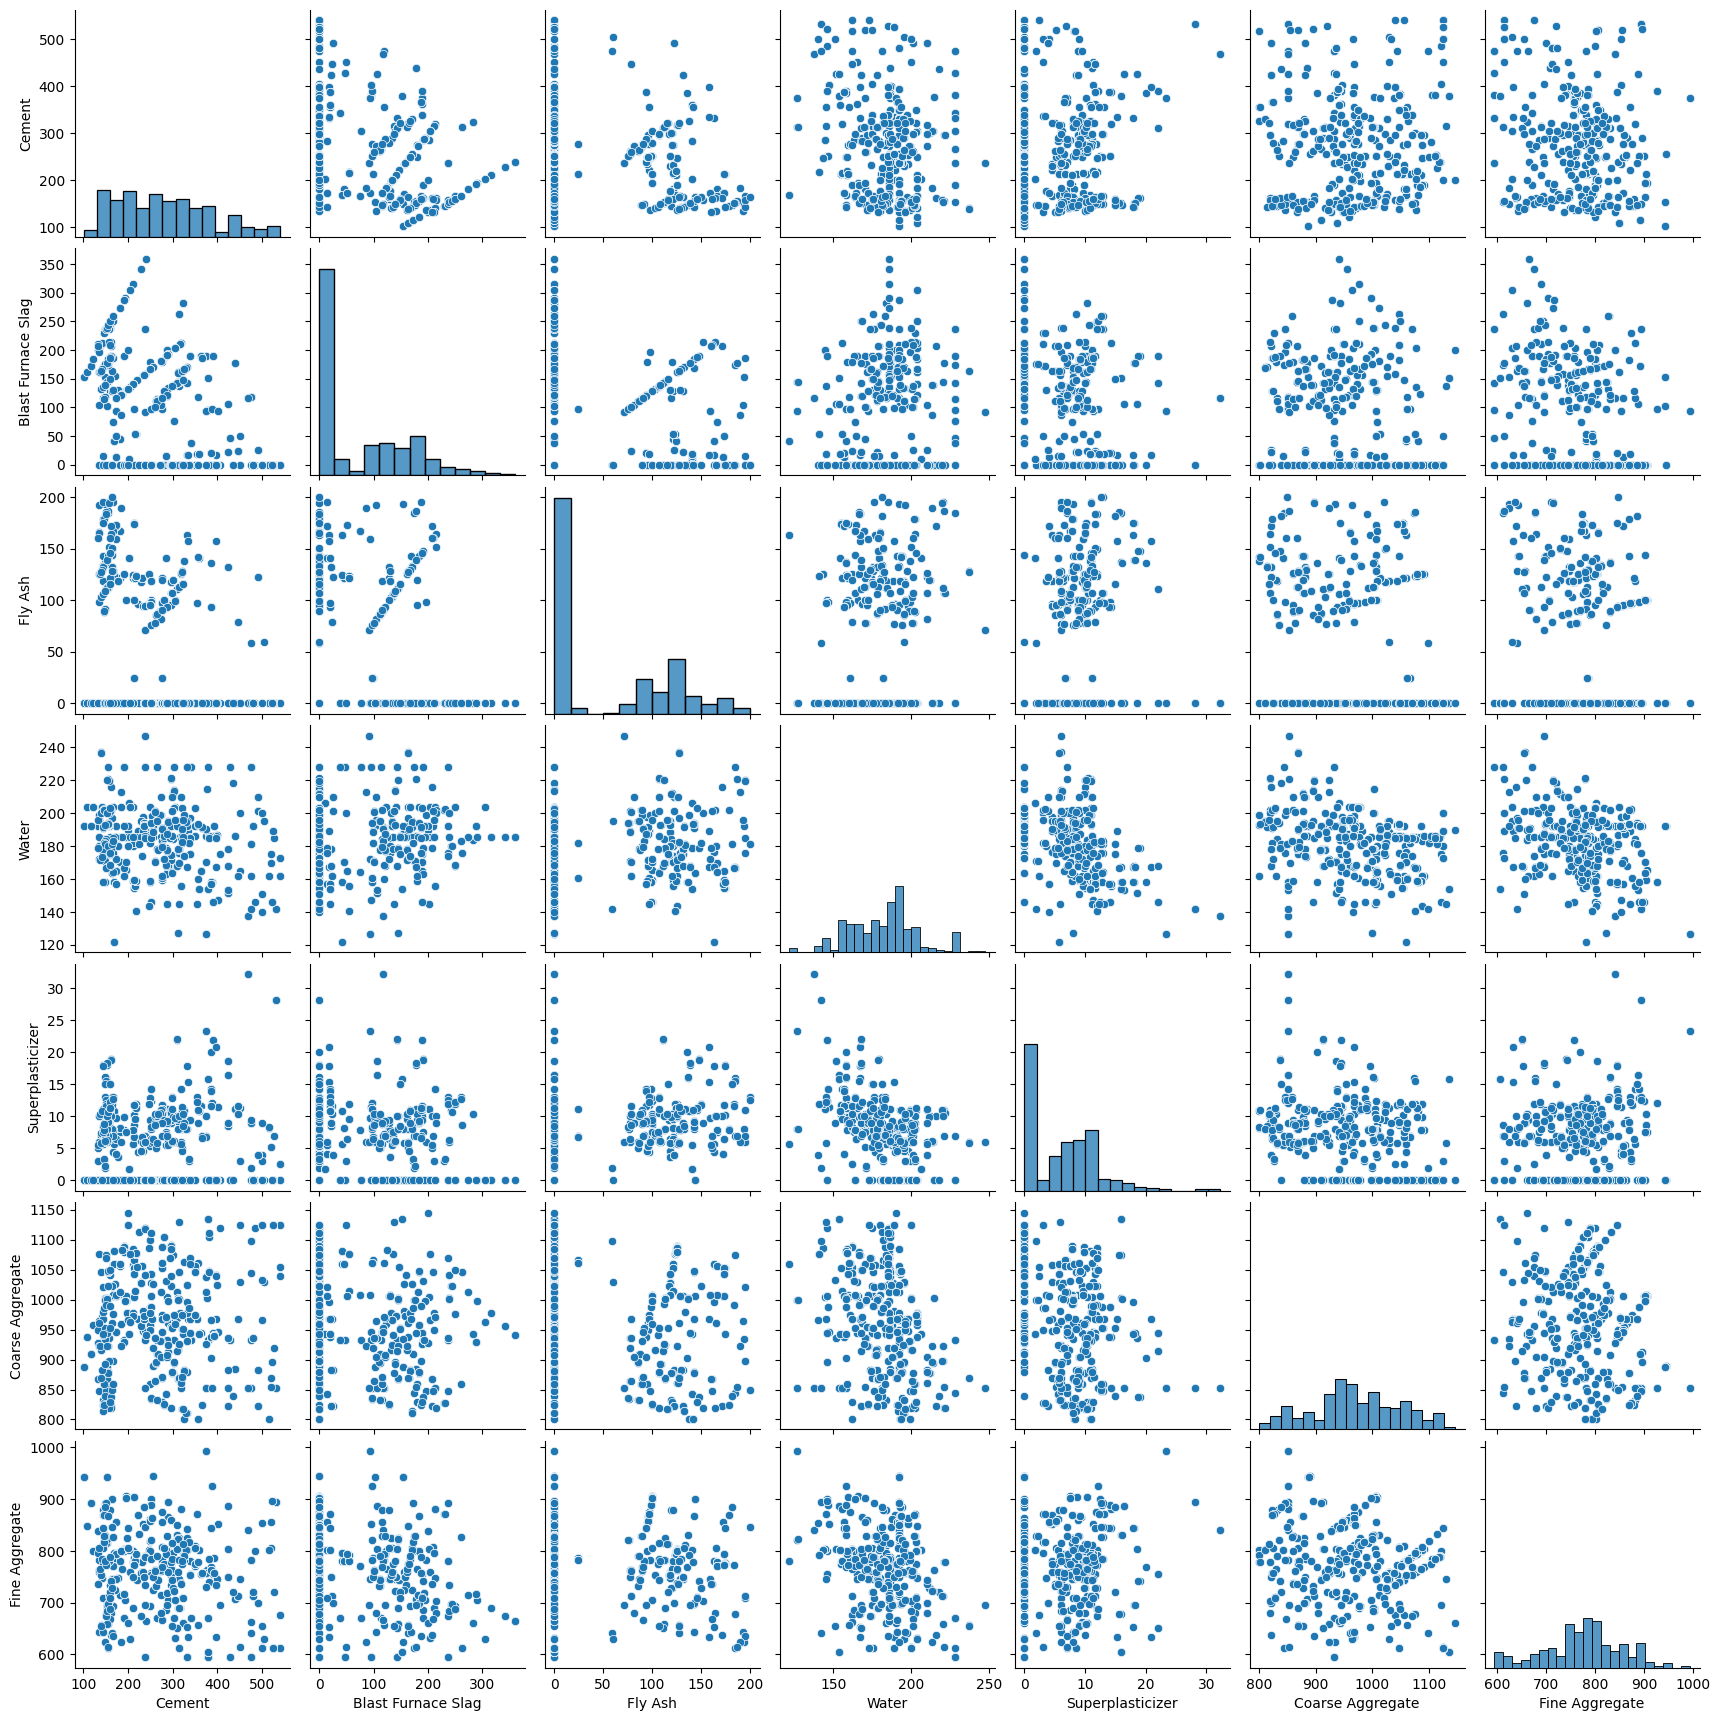

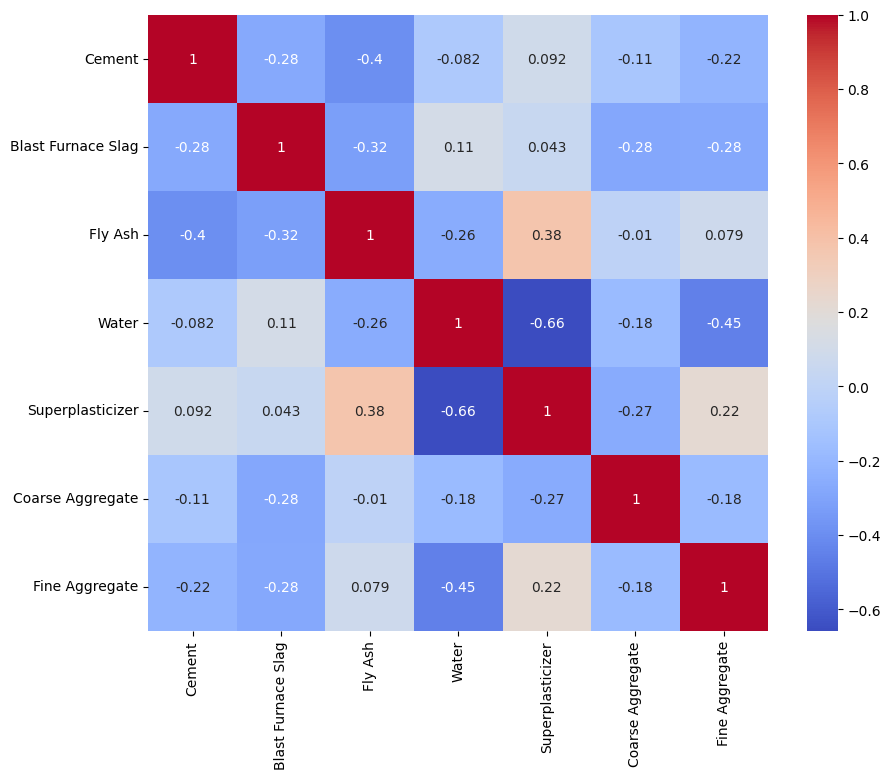

In [12]:
sns.pairplot(features)
plt.show()

corr_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
targets

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [79]:
targets = y.rename(columns = {'Concrete compressive strength': 'Concrete'})
targets

,Concrete
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


## Normalização

In [74]:
scaler = StandardScaler()
features2 = scaler.fit_transform(features)
features = pd.DataFrame(features2, columns=features.columns)
del features2
features

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884
...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166


## Separação Treino / Teste

In [92]:
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [93]:
print(len(features_train), len(features_test), len(target_train), len(target_test))

824 206 824 206


In [94]:
target_train.columns

Index(['Concrete'], dtype='object')

In [95]:
features.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate'],
      dtype='object')

In [96]:
df = features_train
Cement_train = df['Cement'].values
Blast_Furnace_Slag_train = df['Blast Furnace Slag'].values
Fly_Ash_train = df['Fly Ash'].values
Water_train = df['Water'].values
Superplasticizer_train = df['Superplasticizer'].values
Coarse_Aggregate_train = df['Coarse Aggregate'].values
Fine_Aggregate_train = df['Fine Aggregate'].values


# Modelo A Regressão Ridge

In [97]:
with pm.Model() as modeloA:
    beta = pm.Normal("beta",0 , 1, shape=7)
    alpha = pm.Normal("alpha",0 ,1)
    eps   = pm.HalfNormal("eps", 1)

    mu = alpha + (beta[0] * Cement_train +
                  beta[1] * Blast_Furnace_Slag_train +
                  beta[2] * Fly_Ash_train +
                  beta[3] * Water_train +
                  beta[4] * Superplasticizer_train +
                  beta[5] * Coarse_Aggregate_train +
                  beta[6] * Fine_Aggregate_train)

    likelihood = pm.Normal("likelihood",mu, eps, observed= target_train.Concrete.values)

# Modelo **Matemático**

In [98]:
modeloA

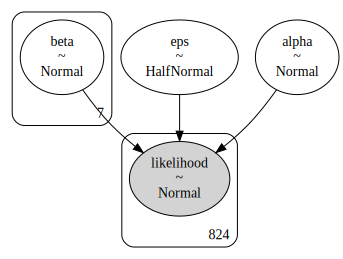

In [87]:
pm.model_to_graphviz(modeloA)

## Análise Preditiva a Priori

In [99]:
with modeloA:
  trace_priori_modeloA = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

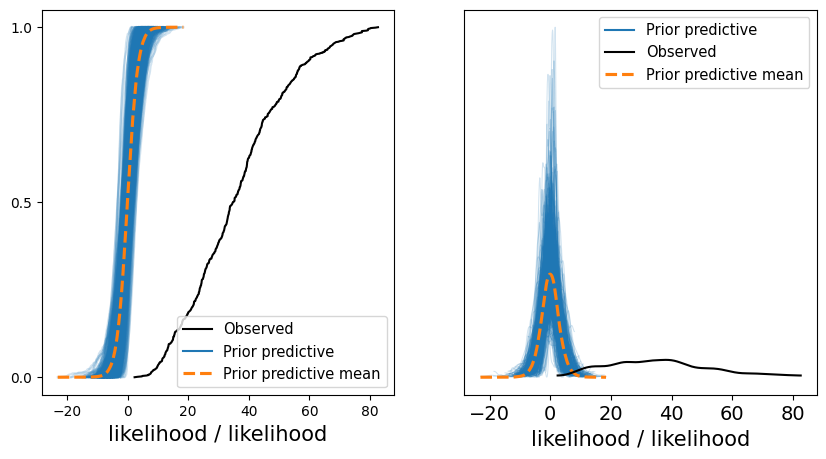

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_modeloA, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_modeloA, group='prior',ax=axes[1])

## Aprendizado dos parâmetros

In [102]:
with modeloA:
  trace_modeloA = pm.sample()

pm.summary(trace_modeloA)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],6.255,0.554,5.225,7.309,0.016,0.011,1193.0,1359.0,1.01
beta[1],3.191,0.546,2.133,4.206,0.015,0.011,1294.0,1508.0,1.00
beta[2],0.014,0.528,-0.977,1.029,0.015,0.011,1164.0,1319.0,1.00
beta[3],-3.634,0.589,-4.733,-2.576,0.016,0.011,1351.0,1409.0,1.00
beta[4],2.876,0.541,1.910,3.910,0.013,0.009,1829.0,1430.0,1.00
beta[5],-1.081,0.520,-2.089,-0.183,0.013,0.009,1538.0,1558.0,1.00
beta[6],-2.511,0.543,-3.523,-1.514,0.015,0.011,1302.0,1461.0,1.00
alpha,29.906,0.483,28.974,30.797,0.010,0.007,2234.0,1492.0,1.00
eps,12.904,0.320,12.349,13.546,0.007,0.005,1849.0,1437.0,1.00


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

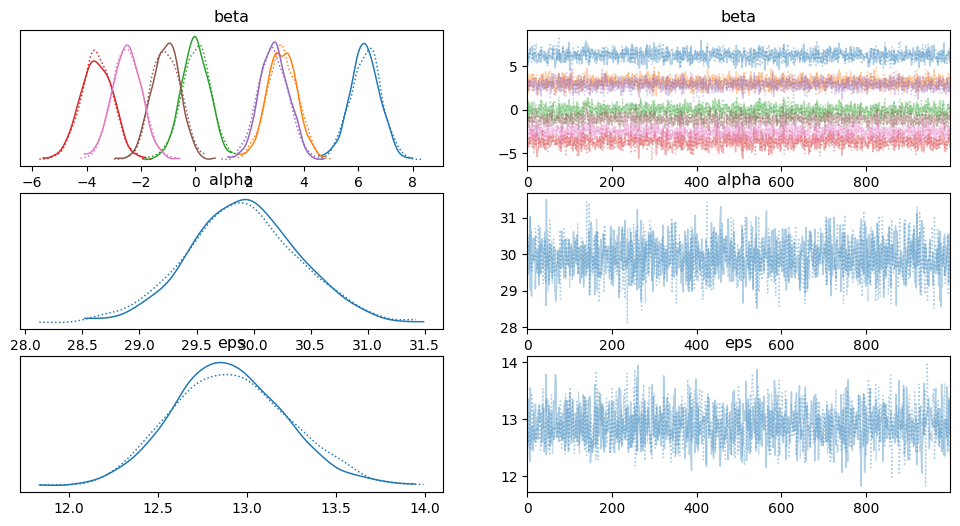

In [103]:
az.plot_trace(trace_modeloA)

## Análise Preditiva a Posteriori

In [104]:
with modeloA:
    trace_modeloA_post = pm.sample_posterior_predictive(trace_modeloA)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

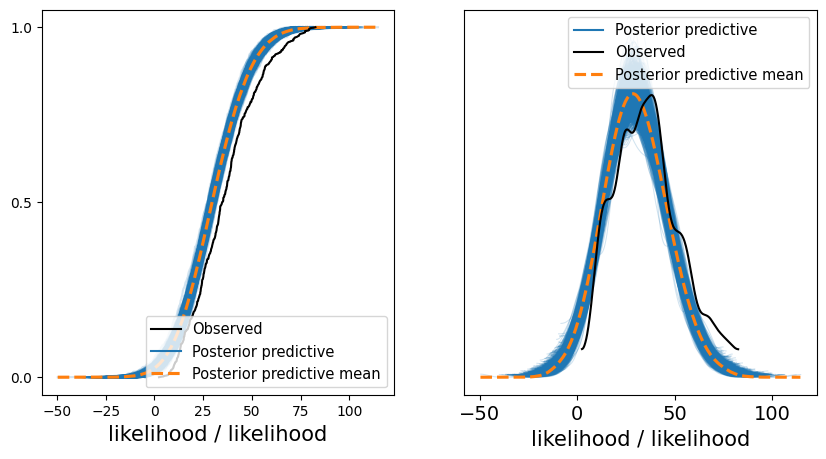

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_modeloA_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_modeloA_post, group='posterior', ax=axes[1])

# Modelo B - Regressão Lasso

In [107]:
with pm.Model() as modeloB:
    beta = pm.Laplace("beta",0 , 1, shape=7)
    alpha = pm.Laplace("alpha",0 ,1)
    eps   = pm.HalfNormal("eps", 1)

    mu = alpha + (beta[0] * Cement_train +
                  beta[1] * Blast_Furnace_Slag_train +
                  beta[2] * Fly_Ash_train +
                  beta[3] * Water_train +
                  beta[4] * Superplasticizer_train +
                  beta[5] * Coarse_Aggregate_train +
                  beta[6] * Fine_Aggregate_train)

    likelihood = pm.Normal("likelihood",mu, eps, observed=target_train.Concrete.values)

# Modelo **Matemático**

In [108]:
modeloB

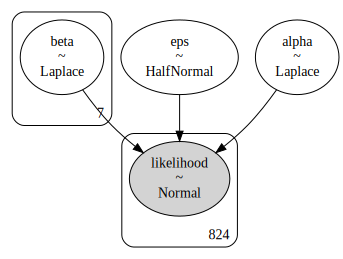

In [109]:
pm.model_to_graphviz(modeloB)

## Análise Preditiva a Priori

In [110]:
with modeloB:
  trace_priori_modeloB = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

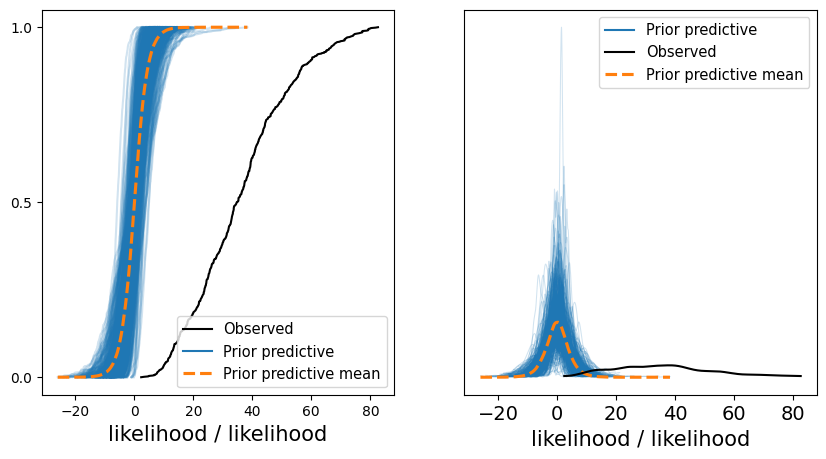

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_modeloB, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_modeloB, group='prior',ax=axes[1])

In [112]:
with modeloB:
  trace_modeloB = pm.sample()

pm.summary(trace_modeloB)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],9.770,0.859,8.157,11.404,0.029,0.021,874.0,943.0,1.0
beta[1],5.904,0.837,4.301,7.356,0.028,0.020,917.0,1000.0,1.0
beta[2],2.437,0.824,0.891,3.931,0.026,0.019,1027.0,1242.0,1.0
beta[3],-3.037,0.816,-4.628,-1.562,0.025,0.018,1064.0,1112.0,1.0
beta[4],2.211,0.674,0.935,3.486,0.018,0.013,1416.0,1115.0,1.0
beta[5],0.165,0.607,-0.896,1.408,0.020,0.017,970.0,877.0,1.0
beta[6],-0.857,0.758,-2.241,0.528,0.025,0.018,916.0,1054.0,1.0
alpha,35.763,0.435,34.941,36.576,0.010,0.007,1696.0,1147.0,1.0
eps,11.658,0.256,11.202,12.154,0.006,0.004,1847.0,1499.0,1.0


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

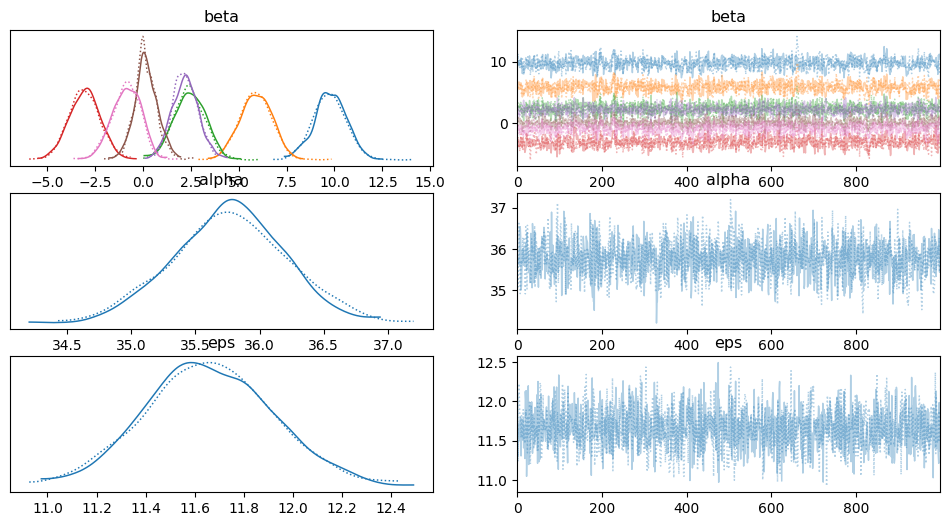

In [113]:
az.plot_trace(trace_modeloB)

## Análise Preditiva a Posteriori

In [134]:
with modeloB:
    trace_modeloB_post = pm.sample_posterior_predictive(trace_modeloB)

In [137]:
pm.summary(trace_modeloB_post)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
likelihood[0],43.808,11.825,21.061,65.458,0.259,0.183,2089.0,1943.0,1.0
likelihood[1],34.715,11.667,13.135,56.394,0.263,0.189,1966.0,2048.0,1.0
likelihood[2],35.868,11.753,12.930,56.829,0.279,0.198,1769.0,1768.0,1.0
likelihood[3],29.236,11.485,8.572,51.912,0.265,0.194,1831.0,1847.0,1.0
likelihood[4],47.062,11.806,25.580,69.969,0.256,0.187,2123.0,1860.0,1.0
...,...,...,...,...,...,...,...,...,...
likelihood[819],29.382,11.635,7.771,51.212,0.271,0.194,1834.0,1872.0,1.0
likelihood[820],35.484,11.706,11.807,56.169,0.262,0.185,1997.0,1934.0,1.0
likelihood[821],29.587,11.619,7.410,49.986,0.262,0.187,1964.0,1805.0,1.0
likelihood[822],47.064,12.065,25.146,69.313,0.265,0.188,2074.0,1689.0,1.0


array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

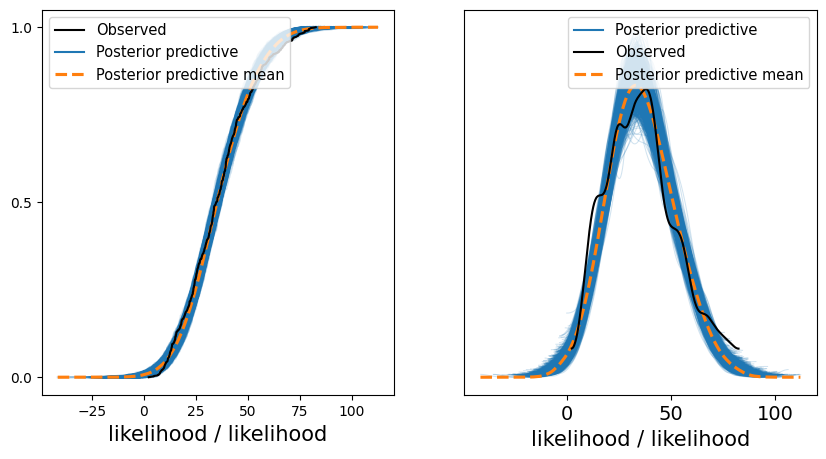

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_modeloB_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_modeloB_post, group='posterior', ax=axes[1])

# Modelo C Regressão Robusta

In [139]:
with pm.Model() as modeloC:
    beta  = pm.Normal("beta" , 0 , 1, shape=7)
    alpha = pm.Normal("alpha", 0 , 1)
    eps   = pm.HalfNormal("eps", 1)
    df    = pm.Exponential('df', 1)

    mu = alpha + (beta[0] * Cement_train +
                  beta[1] * Blast_Furnace_Slag_train +
                  beta[2] * Fly_Ash_train +
                  beta[3] * Water_train +
                  beta[4] * Superplasticizer_train +
                  beta[5] * Coarse_Aggregate_train +
                  beta[6] * Fine_Aggregate_train)

    likelihood = pm.StudentT("likelihood",nu=df, mu=mu, sigma=eps, observed=target_train.Concrete.values)

# Modelo **Matemático**

In [119]:
modeloC

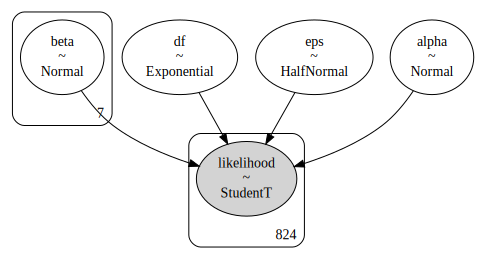

In [120]:
pm.model_to_graphviz(modeloC)

## Análise Preditiva a Priori

In [186]:
with modeloC:
  trace_priori_modeloC = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

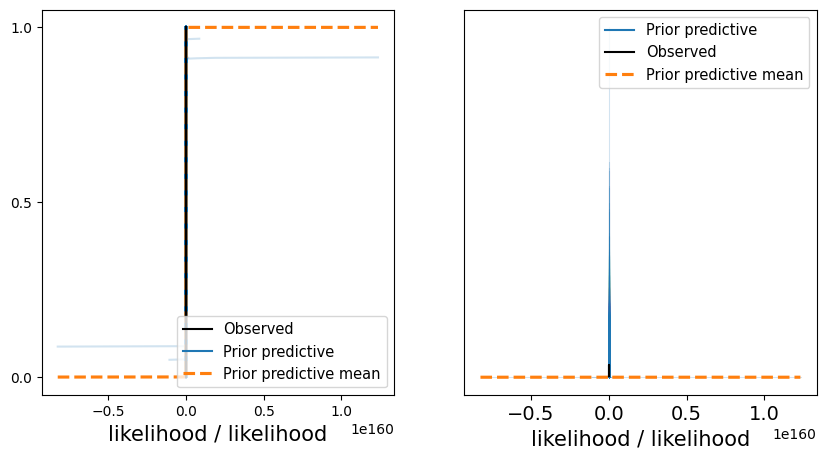

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_modeloC, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_modeloC, group='prior',ax=axes[1])

## Aprendizado de Parâmetros

In [188]:
with modeloC:
  trace_modeloC = pm.sample()

pm.summary(trace_modeloC)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],5.950,0.574,4.890,7.044,0.014,0.010,1676.0,1622.0,1.0
beta[1],2.772,0.562,1.661,3.821,0.015,0.010,1481.0,1463.0,1.0
beta[2],-0.040,0.543,-1.004,1.005,0.013,0.011,1732.0,1684.0,1.0
beta[3],-2.979,0.614,-4.121,-1.833,0.015,0.011,1602.0,1402.0,1.0
beta[4],2.951,0.579,1.862,4.046,0.014,0.010,1828.0,1523.0,1.0
beta[5],-1.381,0.524,-2.300,-0.333,0.012,0.009,1761.0,1478.0,1.0
beta[6],-2.443,0.529,-3.414,-1.427,0.014,0.010,1377.0,1607.0,1.0
alpha,29.279,0.482,28.353,30.170,0.010,0.007,2434.0,1421.0,1.0
eps,11.447,0.393,10.724,12.191,0.009,0.006,2050.0,1481.0,1.0
df,6.005,1.208,4.042,8.357,0.027,0.019,2106.0,1723.0,1.0


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>]],
      dtype=object)

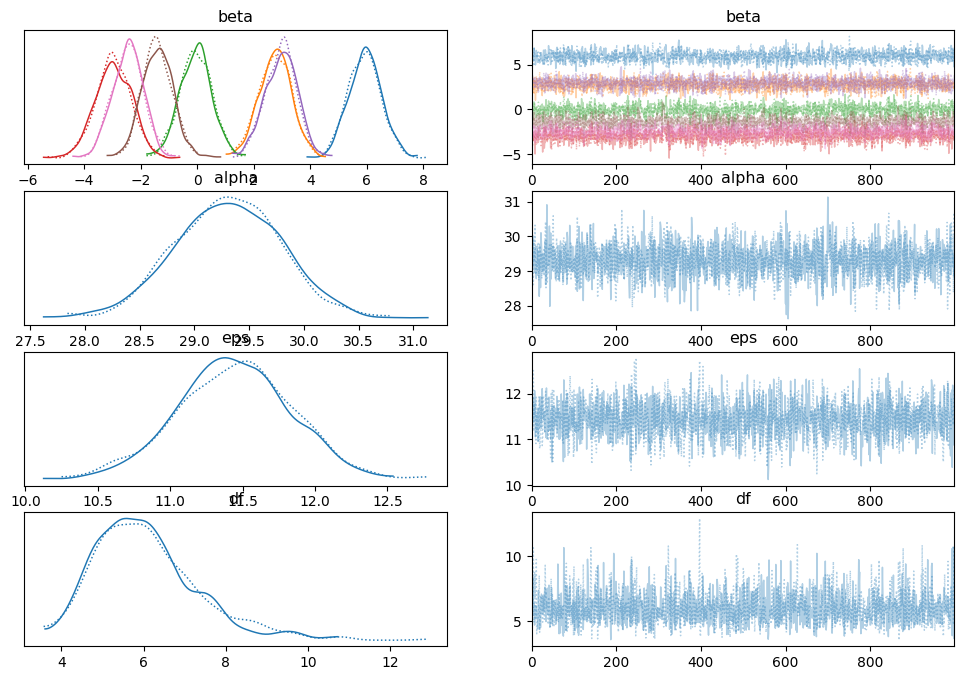

In [124]:
az.plot_trace(trace_modeloC)

## Análise Preditiva a Posteriori

In [189]:
with modeloC:
    trace_modeloC_post = pm.sample_posterior_predictive(trace_modeloC)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

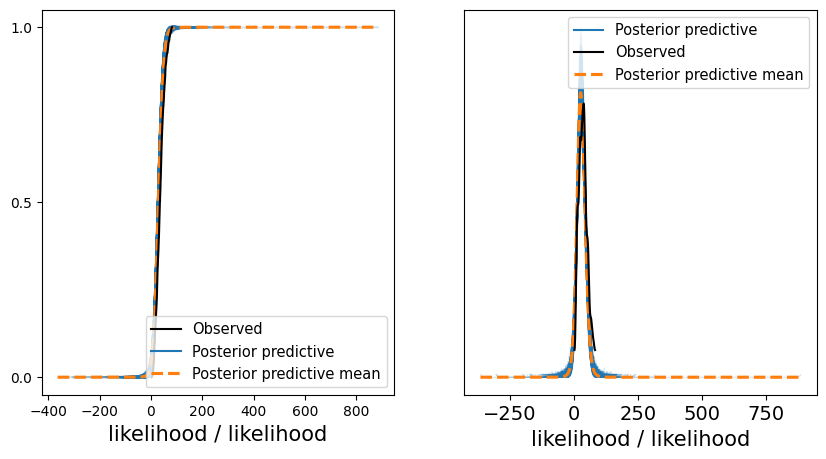

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_modeloC_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_modeloC_post, group='posterior', ax=axes[1])

# Comparação dos Modelos


In [ ]:
with modeloA:
  pm.compute_log_likelihood(trace_modeloA)

with modeloB:
  pm.compute_log_likelihood(trace_modeloB)

with modeloC:
  pm.compute_log_likelihood(trace_modeloC)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

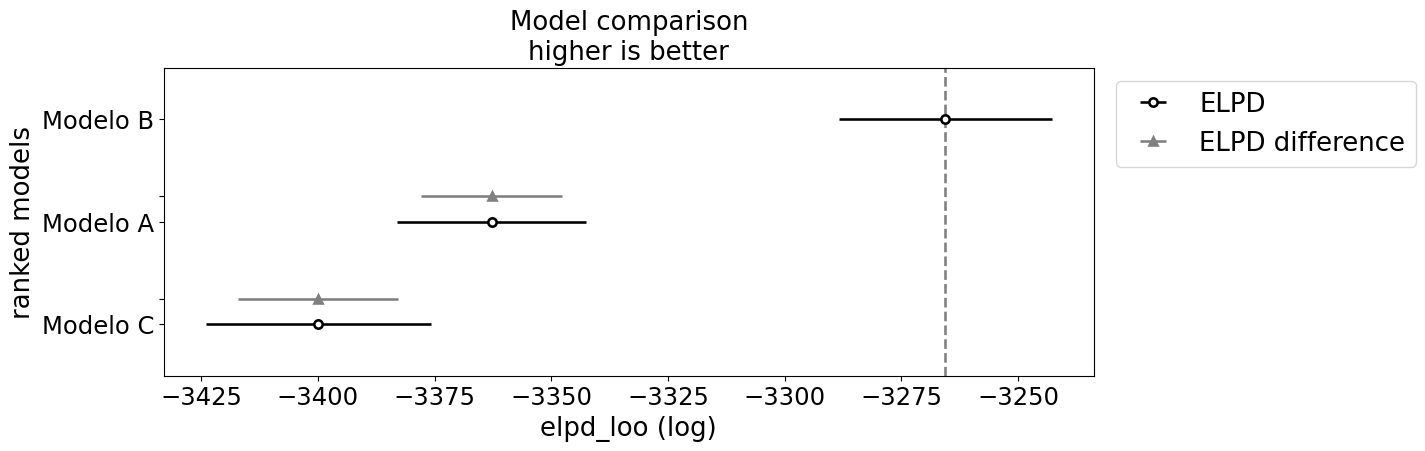

In [155]:
model_compare = az.compare(
    {
        "Modelo A": trace_modeloA,
        "Modelo B": trace_modeloB,
        "Modelo C": trace_modeloC

    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [192]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Modelo B,0,-3265.647676,9.960368,0.000000,1.000000e+00,22.786722,0.000000,False,log
Modelo A,1,-3362.786190,7.318783,97.138515,8.362474e-26,20.144580,15.119235,False,log
Modelo C,2,-3399.874600,8.544447,134.226925,1.270656e-38,24.052915,17.128496,False,log


# Teste

In [196]:
with pm.Model() as modelo_mutable:

    Cement = pm.MutableData('Cement', Cement_train)
    Blast_Furnace_Slag  = pm.MutableData('Blast Furnace Slag', Blast_Furnace_Slag_train)
    Fly_Ash   = pm.MutableData('Fly Ash',  Fly_Ash_train)
    Water  = pm.MutableData('Water', Water_train)
    Superplasticizer = pm.MutableData('Superplasticizer', Superplasticizer_train)
    Coarse_Aggregate   = pm.MutableData('Coarse Aggregate'  , Coarse_Aggregate_train)
    Fine_Aggregate = pm.MutableData('Fine Aggregate', Fine_Aggregate_train)
    yobs = pm.MutableData('yobs', target_train.Concrete.values)


    beta  = pm.Normal("beta",0 , 1, shape=7)
    alpha = pm.Normal("alpha",0 ,1)
    eps   = pm.HalfNormal("eps", 1)

    mu = alpha + (beta[0] * Cement+
                  beta[1] * Blast_Furnace_Slag+
                  beta[2] * Fly_Ash +
                  beta[3] * Water +
                  beta[4] * Superplasticizer +
                  beta[5] * Coarse_Aggregate+
                  beta[6] * Fine_Aggregate)


    likelihood = pm.Normal("likelihood", mu=mu, sigma=eps, observed=yobs)

In [195]:
with modelo_mutable:
  trace_mu= pm.sample()

In [197]:
df = features_test

Cement_test = df['Cement'].values
Blast_Furnace_Slag_test = df['Blast Furnace Slag'].values
Fly_Ash_test = df['Fly Ash'].values
Water_test = df['Water'].values
Superplasticizer_test = df['Superplasticizer'].values
Coarse_Aggregate_test = df['Coarse Aggregate'].values
Fine_Aggregate_test = df['Fine Aggregate'].values
yobs_test = target_test.Concrete.values

In [209]:
with modelo_mutable:
    pm.set_data({
        "Cement": Cement_test,
        "Blast Furnace Slag": Blast_Furnace_Slag_test,
        "Fly Ash": Fly_Ash_test,
        "Water": Water_test,
        "Superplasticizer": Superplasticizer_test,
        "Coarse Aggregate": Coarse_Aggregate_test,
        "Fine Aggregate": Fine_Aggregate_test,
        "yobs": yobs_test
    })
    trace_post_mu = pm.sample_posterior_predictive(trace_mu)

In [210]:
trace_post_mu        # talvez seja isso que tenhamos que salvar

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [211]:
preds = trace_post_mu.posterior_predictive["likelihood"].mean(["chain","draw"]).to_numpy()

In [212]:
df_predictions = pd.DataFrame({
    'Predicted': preds,
    'Actual': yobs_test
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())

zero_diff_count = (df_predictions['Abs_Difference'] == 0).sum()
print(zero_diff_count)
print(zero_diff_count/len(yobs_test), 'Ridge')


   Predicted  Actual  Abs_Difference
0  37.240591   26.06       11.180591
1  16.815995   10.35        6.465995
2  45.442015   79.30       33.857985
3  42.027912   74.99       32.962088
4  23.584545    9.69       13.894545
2231.6520248647157
0
0.0 Ridge
